# Question 1

In [61]:
import numpy as np

### Create and print a 2-dimensional NumPy array of shape (5, 5) filled with random integers between 1 and 100

In [62]:
arr = np.random.randint(1, 101, size=(5, 5))

In [63]:
arr

array([[10, 36, 44, 81, 59],
       [70, 54, 62,  8, 69],
       [60, 49, 31,  5, 70],
       [87, 71, 12, 94, 32],
       [63, 58, 65, 40,  2]])

### Extract and print the middle element of the array using NumPy indexing.

In [64]:
arr[2][2]

31

### Calculate and print the mean of each row of the array.

In [65]:
row_means = np.mean(arr, axis=1)


In [66]:
row_means

array([46. , 52.6, 43. , 59.2, 45.6])

### Create a new array that contains only the elements from the original array that are greater than the overall mean of the array.

In [67]:
overall_mean = np.mean(arr)
newarr = arr[arr > overall_mean]

In [68]:
newarr

array([81, 59, 70, 54, 62, 69, 60, 70, 87, 71, 94, 63, 58, 65])

### Write a Python function numpy_spiral_order(matrix) that takes a NumPy matrix and returns a list containing the elements visited in a spiral order.

In [ ]:
def spiral_order(mat):
    matrix = mat.copy()
    if not matrix.size:
        return []
    result = []
    while matrix.size:
        result += matrix[0].tolist()
        matrix = matrix[1:].T[::-1]
    return result

In [70]:
matrix = np.array([[1,2,3,4,5],
                  [6,7,8,9,10],
                  [11,12,13,14,15],
                  [16,17,18,19,20],
                  [21,22,23,24,25]])
print(matrix)
res = spiral_order(matrix)
print("Spiral order: ",res) 

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
Spiral order:  [1, 2, 3, 4, 5, 10, 15, 20, 25, 24, 23, 22, 21, 16, 11, 6, 7, 8, 9, 14, 19, 18, 17, 12, 13]


# Question 2

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


### Add a column of ‘global_sales’ showing the total sales of all the different regions to the data frame and sort (highest first) and print the DataFrame according to it.

In [22]:
df = pd.read_csv('videogamesales.csv')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05
1,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03
2,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01
3,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01
4,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01


In [26]:
df['Global_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.sort_values(by='Global_sales',ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,global_sales,Global_sales
6109,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82.74
122,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40.24
8315,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83,35.83
9743,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33.00
705,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38,31.38
...,...,...,...,...,...,...,...,...,...,...,...
10978,Military History: Commander - Europe at War,DS,2009.0,Strategy,Slitherine Software,0.00,0.01,0.00,0.00,0.01,0.01
7971,Puzzle Quest: Challenge of the Warlords,PSP,2007.0,Puzzle,D3Publisher,0.01,0.00,0.00,0.00,0.01,0.01
7972,Race Driver: Create & Race,DS,2007.0,Racing,Codemasters,0.01,0.00,0.00,0.00,0.01,0.01
10854,Cross Edge Dash,X360,2009.0,Role-Playing,Compile Heart,0.00,0.00,0.01,0.00,0.01,0.01


### Display a plot of the total number of copies sold of each genre globally.

In [36]:
genre_sales = df.groupby('Genre')['Global_sales'].sum()

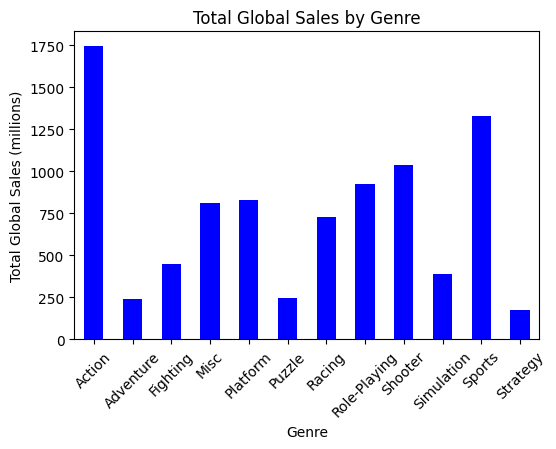

In [35]:
plt.figure(figsize=(6, 4))
genre_sales.plot(kind='bar', color='blue')
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()

### Filter out only the GTA games and display the following as a DataFrame :
1. Their name
2. The platform they were released on
3. The year they were released in
4. The sum of sales in only Europe and Japan


In [43]:
gta_games = df[df['Name'].str.contains('Grand Theft Auto', case=False, na=False)]
gta_games_info = gta_games[['Name', 'Platform', 'Year', 'EU_Sales', 'JP_Sales']].copy()
gta_games_info['EU_JP_Sales'] = gta_games_info['EU_Sales'] + gta_games_info['JP_Sales']
gta_games_info

,Name,Platform,Year,EU_Sales,JP_Sales,EU_JP_Sales
999,Grand Theft Auto,PS,1997.0,1.35,0.04,1.39
1290,Grand Theft Auto 2,PS,1998.0,2.07,0.00,2.07
1469,"Grand Theft Auto: Mission Pack #1, London 1969",PS,1998.0,0.04,0.00,0.04
2323,Grand Theft Auto III,PS2,2001.0,4.51,0.30,4.81
2805,Grand Theft Auto: Vice City,PS2,2002.0,5.49,0.47,5.96
3563,Grand Theft Auto III,PC,2002.0,0.01,0.00,0.01
3639,Rockstar Games Double Pack: Grand Theft Auto I...,XB,2003.0,0.56,0.00,0.56
3688,Rockstar Games Double Pack: Grand Theft Auto I...,PS2,2003.0,0.66,0.00,0.66
4356,Grand Theft Auto: Vice City,PC,2003.0,0.03,0.00,0.03
4405,Grand Theft Auto: San Andreas,PS2,2004.0,0.40,0.41,0.81


### Display a pie chart of the total sales of all Grand Theft Auto games combined in North America, Europe, Japan, and other sales

In [45]:
gta_sales = gta_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

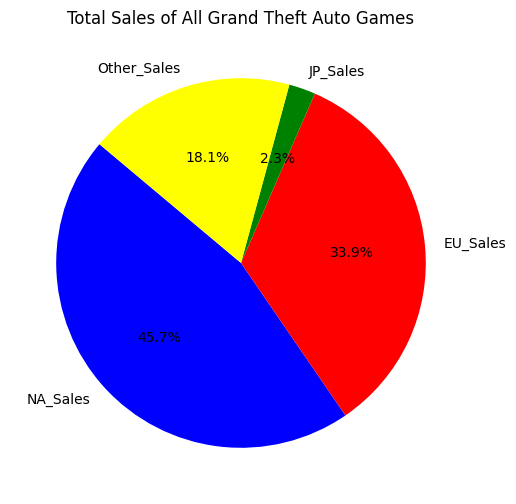

In [50]:
plt.figure(figsize=(10, 6))
gta_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['blue', 'red', 'green', 'yellow'])
plt.title('Total Sales of All Grand Theft Auto Games')
plt.ylabel('')
plt.show()